In [1]:
import sys
import os
import time

import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

# Let's check our software versions
print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

def var_exists(var_name):
    return (var_name in globals() or var_name in locals())

------------
### Python version: 3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]
### NumPy version: 1.26.0
### Scikit-learn version: 1.2.1
------------


In [2]:
import requests

In [3]:
r = requests.get('https://swamplocksapi.azurewebsites.net/api/Financials/stocks')
r.status_code
#print(r.json())
### First in terminal we went to folder 'SwampLocksAPI' and ran 'dotnet run' then we copied the localhost url into the notebook command (in red in pic) then we ran it

200

In [4]:
df = pd.DataFrame(r.json())

In [5]:
#df.info()
df.head(8)

,ticker,sectorName,sector,dataEntries,articles,balanceSheets,cashFlowStatements,incomeStatements,earningStatements,stockSplits
0,A,Healthcare,None,[],[],[],[],[],[],[]
1,AAPL,Information Technology,None,[],[],[],[],[],[],[]
2,ABBV,Healthcare,None,[],[],[],[],[],[],[]
3,ABNB,Consumer Discretionary,None,[],[],[],[],[],[],[]
4,ABT,Healthcare,None,[],[],[],[],[],[],[]
5,ACGL,Financials,None,[],[],[],[],[],[],[]
6,ACN,Information Technology,None,[],[],[],[],[],[],[]
7,ADBE,Information Technology,None,[],[],[],[],[],[],[]


In [68]:
techTickers = []
for i in range(463):
    if df.iloc[i][1] == 'Information Technology':
        techTickers.append(df.iloc[i][0])
        #print(df.iloc[i][0])
techUrls = []
for t in techTickers:
    url = 'https://swamplocksapi.azurewebsites.net/api/Financials/stocks/' + t + '/data'
    techUrls.append(url)
r = requests.get('https://swamplocksapi.azurewebsites.net/api/Financials/stocks/AAPL/filtered_data')


In [69]:
print(len(techTickers))

0


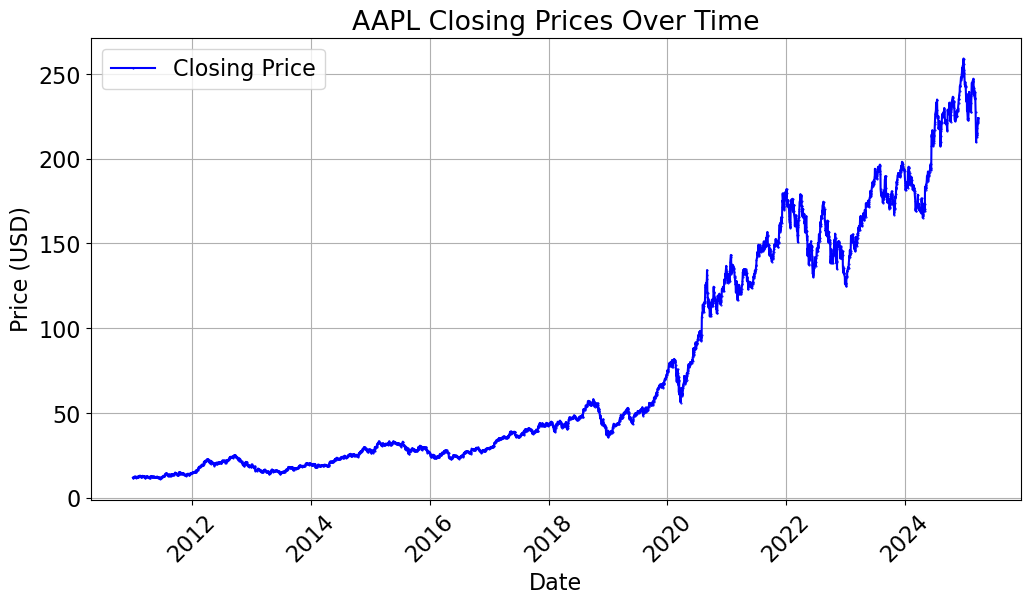

In [70]:
dfAAPLclose = pd.DataFrame(r.json())
dfAAPLclose['date'] = pd.to_datetime(dfAAPLclose['date'])

# Sort by date to ensure proper ordering
dfAAPLclose = dfAAPLclose.sort_values('date')

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(dfAAPLclose['date'], dfAAPLclose['closingPrice'], marker='o', linestyle='-', color='blue', label='Closing Price', markersize=0.5)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('AAPL Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

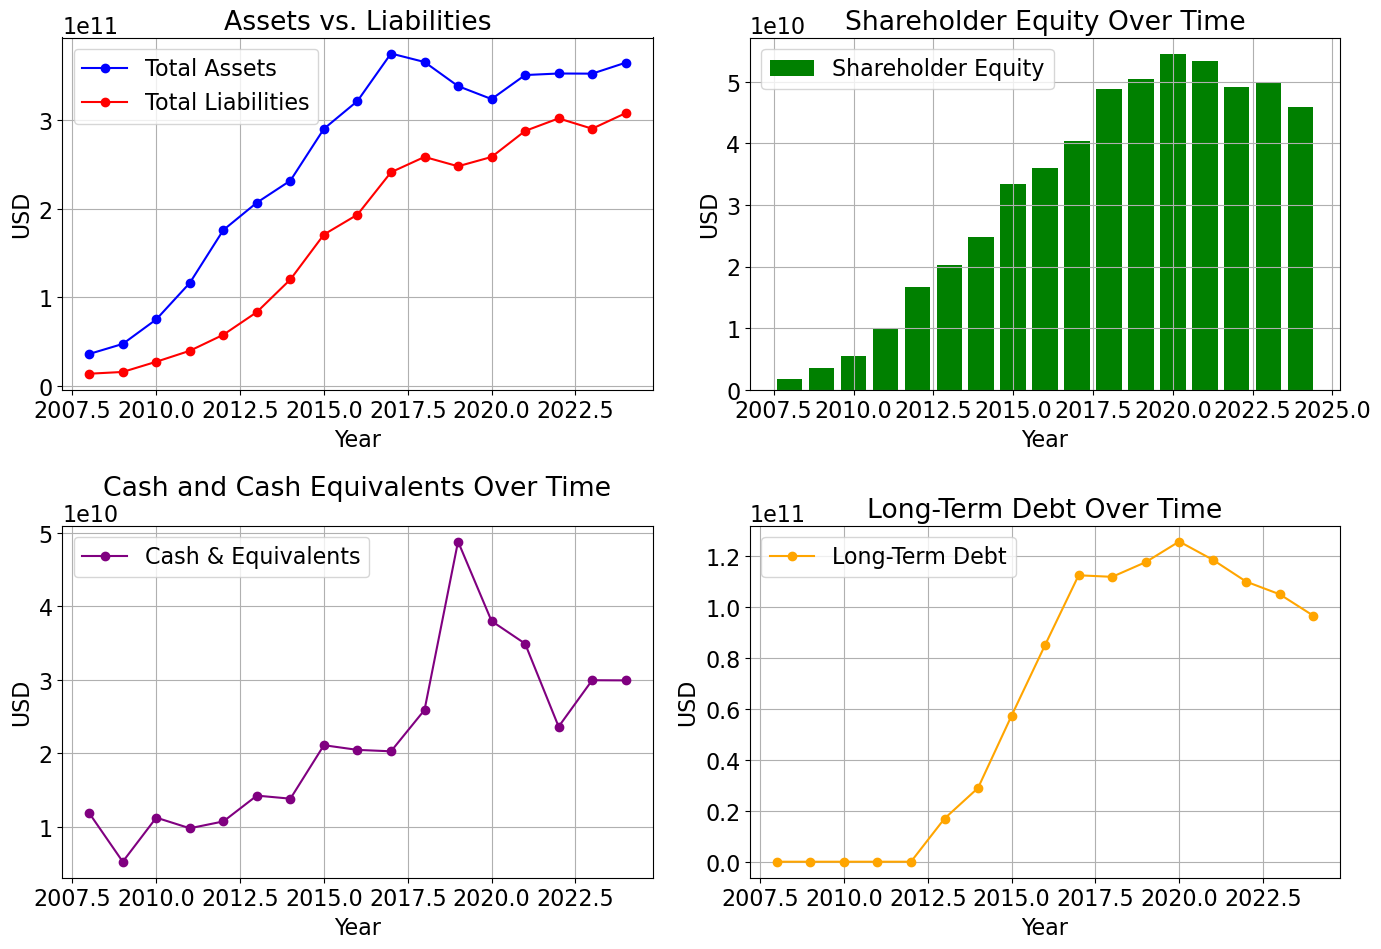

In [9]:
# https://swamplocksapi.azurewebsites.net/api/Financials
aaplbsURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/balancesheets/AAPL'
r = requests.get(aaplbsURL)
#print(r.json())
df = pd.DataFrame(r.json())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Plot 1: Total Assets vs. Total Liabilities
axes[0, 0].plot(df['fiscalYear'], df['totalAssets'], marker='o', label='Total Assets', color='blue')
axes[0, 0].plot(df['fiscalYear'], df['totalLiabilities'], marker='o', label='Total Liabilities', color='red')
axes[0, 0].set_title('Assets vs. Liabilities')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('USD')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Shareholder Equity
axes[0, 1].bar(df['fiscalYear'], df['totalShareholderEquity'], color='green', label='Shareholder Equity')
axes[0, 1].set_title('Shareholder Equity Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('USD')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Cash and Cash Equivalents
axes[1, 0].plot(df['fiscalYear'], df['cashAndCashEquivalents'], marker='o', label='Cash & Equivalents', color='purple')
axes[1, 0].set_title('Cash and Cash Equivalents Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('USD')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Long-Term Debt
axes[1, 1].plot(df['fiscalYear'], df['longTermDebt'], marker='o', label='Long-Term Debt', color='orange')
axes[1, 1].set_title('Long-Term Debt Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('USD')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:
dfbs = pd.DataFrame(r.json())

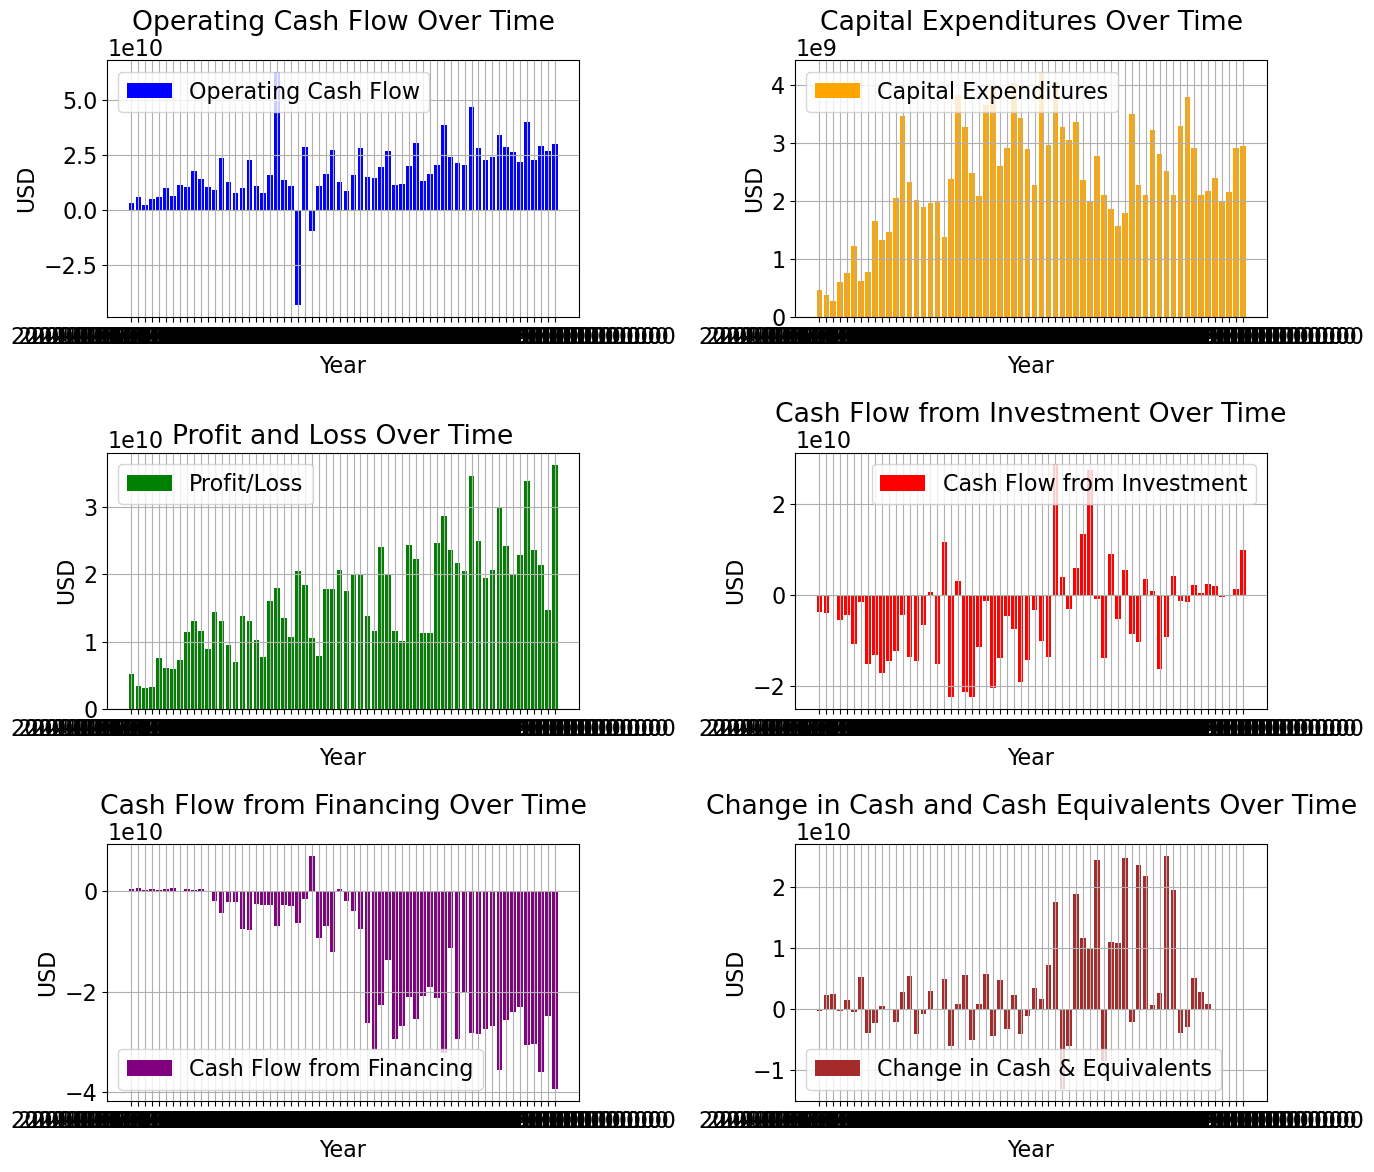

In [11]:
aaplcfURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/cashflowstatements/AAPL'
r = requests.get(aaplcfURL)
#print(r.json())
df = pd.DataFrame(r.json())
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3x2 grid of subplots

# Plot 1: Operating Cash Flow
axes[0, 0].bar(df['fiscalDateEnding'], df['operatingCashFlow'], color='blue', label='Operating Cash Flow')
axes[0, 0].set_title('Operating Cash Flow Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('USD')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Capital Expenditures
axes[0, 1].bar(df['fiscalDateEnding'], df['capitalExpenditures'], color='orange', label='Capital Expenditures')
axes[0, 1].set_title('Capital Expenditures Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('USD')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Profit/Loss
axes[1, 0].bar(df['fiscalDateEnding'], df['profitLoss'], color='green', label='Profit/Loss')
axes[1, 0].set_title('Profit and Loss Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('USD')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Cash Flow from Investment
axes[1, 1].bar(df['fiscalDateEnding'], df['cashFlowFromInvestment'], color='red', label='Cash Flow from Investment')
axes[1, 1].set_title('Cash Flow from Investment Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('USD')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Plot 5: Cash Flow from Financing
axes[2, 0].bar(df['fiscalDateEnding'], df['cashFlowFromFinancing'], color='purple', label='Cash Flow from Financing')
axes[2, 0].set_title('Cash Flow from Financing Over Time')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('USD')
axes[2, 0].legend()
axes[2, 0].grid(True)

# Plot 6: Change in Cash and Cash Equivalents
axes[2, 1].bar(df['fiscalDateEnding'], df['changeInCashAndCashEquivalents'], color='brown', label='Change in Cash & Equivalents')
axes[2, 1].set_title('Change in Cash and Cash Equivalents Over Time')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('USD')
axes[2, 1].legend()
axes[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
dfcf = df

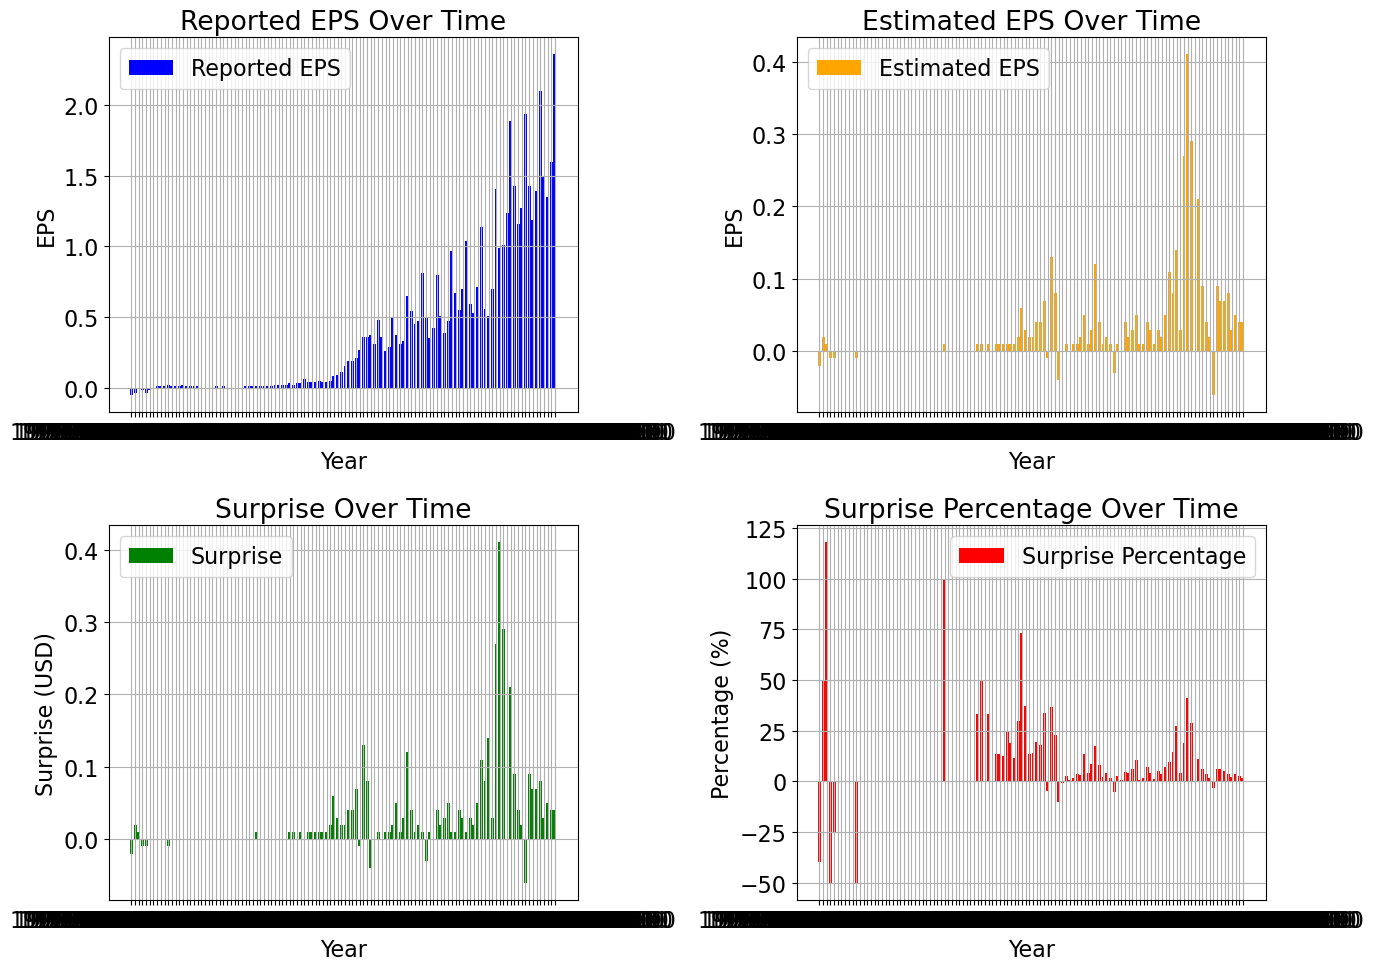

In [13]:
aapleURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/earnings/AAPL'
r = requests.get(aapleURL)
#print(r.json())
df = pd.DataFrame(r.json())
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Plot 1: Reported EPS
axes[0, 0].bar(df['fiscalDateEnding'], df['reportedEPS'], color='blue', label='Reported EPS')
axes[0, 0].set_title('Reported EPS Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('EPS')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Estimated EPS
axes[0, 1].bar(df['fiscalDateEnding'], df['estimatedEPS'], color='orange', label='Estimated EPS')
axes[0, 1].set_title('Estimated EPS Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('EPS')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Surprise
axes[1, 0].bar(df['fiscalDateEnding'], df['surprise'], color='green', label='Surprise')
axes[1, 0].set_title('Surprise Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Surprise (USD)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Surprise Percentage
axes[1, 1].bar(df['fiscalDateEnding'], df['suprisePercentage'], color='red', label='Surprise Percentage')
axes[1, 1].set_title('Surprise Percentage Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
dfe = df

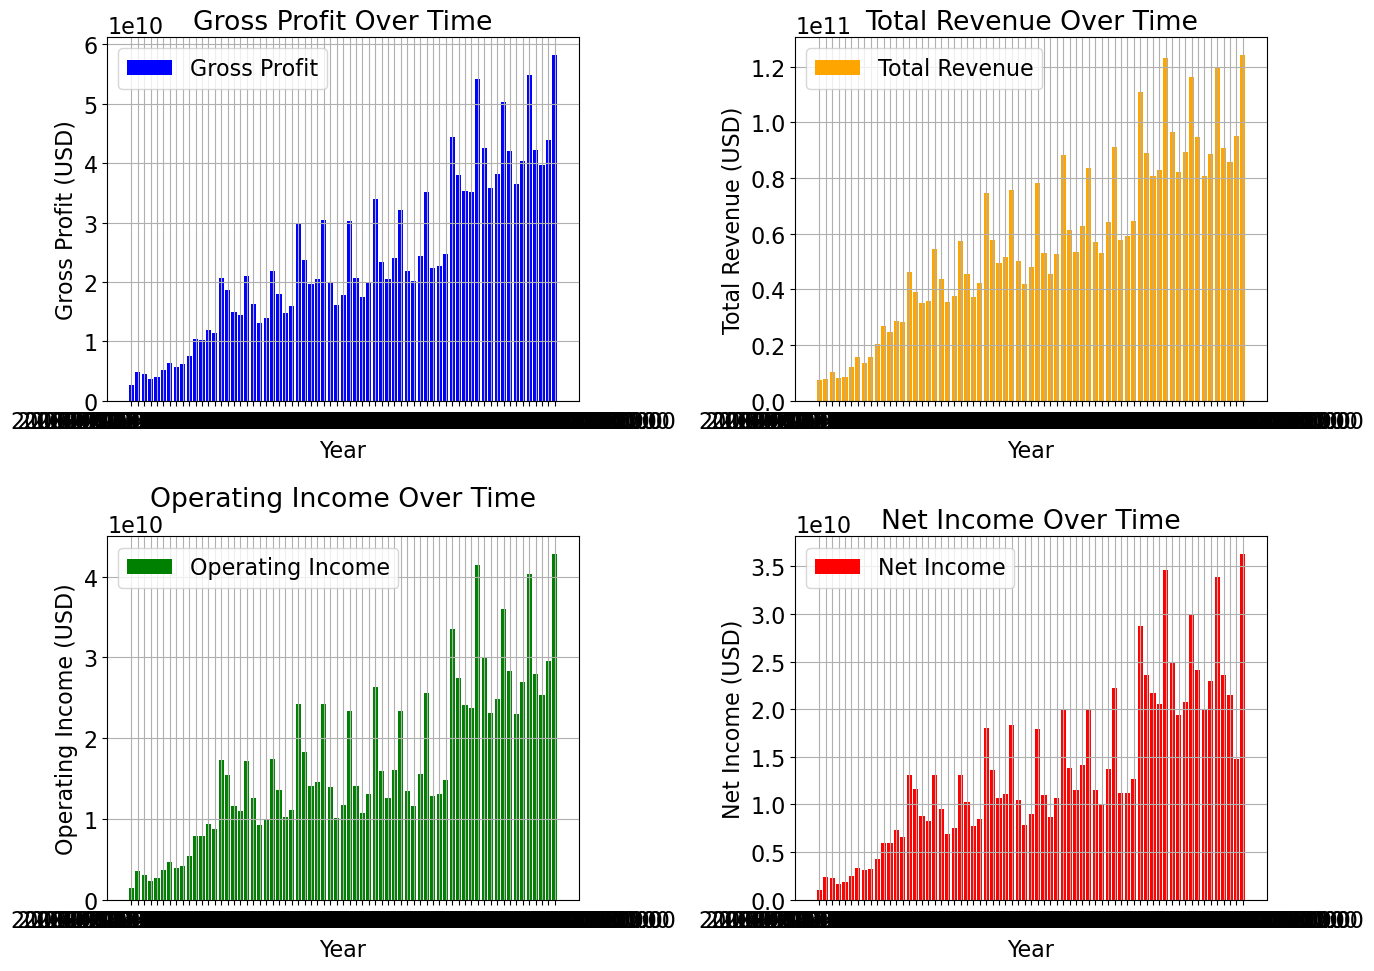

In [15]:
aaplisURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/incomestatements/AAPL'
r = requests.get(aaplisURL)
#print(r.json())
df = pd.DataFrame(r.json())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Plot 1: Gross Profit
axes[0, 0].bar(df['fiscalDateEnding'], df['grossProfit'], color='blue', label='Gross Profit')
axes[0, 0].set_title('Gross Profit Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Gross Profit (USD)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Total Revenue
axes[0, 1].bar(df['fiscalDateEnding'], df['totalRevenue'], color='orange', label='Total Revenue')
axes[0, 1].set_title('Total Revenue Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total Revenue (USD)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Operating Income
axes[1, 0].bar(df['fiscalDateEnding'], df['operatingIncome'], color='green', label='Operating Income')
axes[1, 0].set_title('Operating Income Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Operating Income (USD)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Net Income
axes[1, 1].bar(df['fiscalDateEnding'], df['netIncome'], color='red', label='Net Income')
axes[1, 1].set_title('Net Income Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Net Income (USD)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
dfis = df

In [17]:
aaplartURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/stocks/AAPL/articles'
r = requests.get(aaplartURL)
#print(r.json())
df = pd.DataFrame(r.json())

df['date'] = pd.to_datetime(df['date']).dt.date

# Step 2: Group by the 'date' and calculate the mean of 'sentimentScore'
grouped = df.groupby('date')['sentimentScore'].mean()

# Step 3: Sort by date
sorted_grouped = grouped.sort_index()

# Step 4: Display the results
#for date, avg_sentiment in sorted_grouped.items():
    #print(f"Date: {date}, Average Sentiment Score: {avg_sentiment}")
    

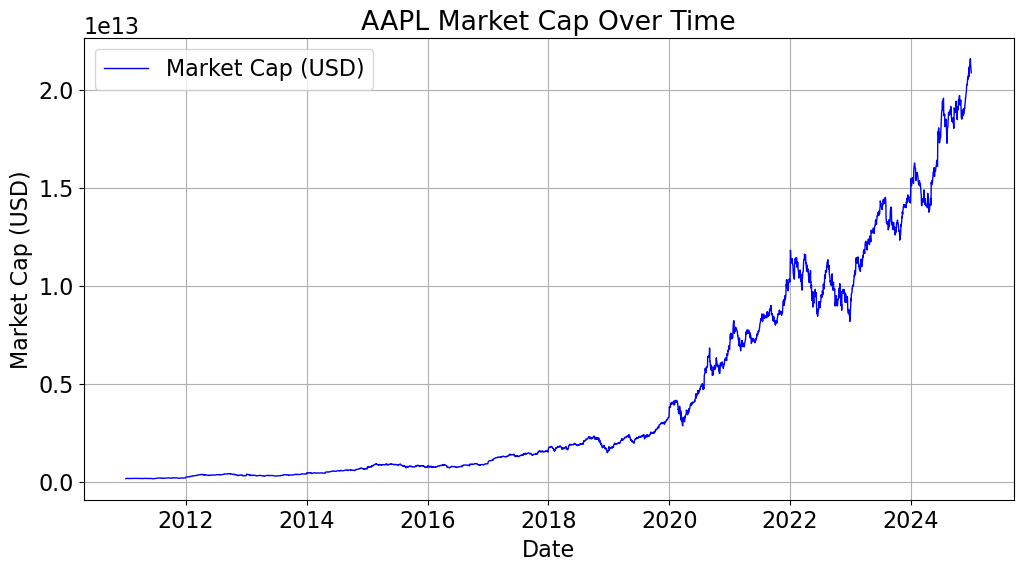

In [71]:
# in https://swamplocksapi.azurewebsites.net/api/Financials/balancesheets/AAPL commonStockSharesOutstanding
# closing price in https://swamplocksapi.azurewebsites.net/api/Financials/stocks/AAPL/data

# Assuming dfFinancials contains the financials data with outstanding shares
# Assuming dfAAPLclose contains the daily closing prices data

# 1. Convert dates to datetime format
dfAAPLclose['date'] = pd.to_datetime(dfAAPLclose['date'])

# 2. Merge the two DataFrames based on the fiscal year and the closing date
# Extract the fiscal year from the closing price date
dfAAPLclose['fiscalYear'] = dfAAPLclose['date'].dt.year

# Merge the two DataFrames to match the fiscal year with outstanding shares
merged_df = pd.merge(dfAAPLclose, dfbs[['fiscalYear', 'commonStockSharesOutstanding']], 
                     on='fiscalYear', how='left')

# 3. Calculate the market cap: shares outstanding * closing price
merged_df['marketCap'] = merged_df['closingPrice'] * merged_df['commonStockSharesOutstanding']

# 4. Plot the market cap over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['marketCap'], label='Market Cap (USD)', color='blue', linewidth=1)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Market Cap (USD)')
plt.title('AAPL Market Cap Over Time')
plt.legend()
plt.grid(True)
plt.show()


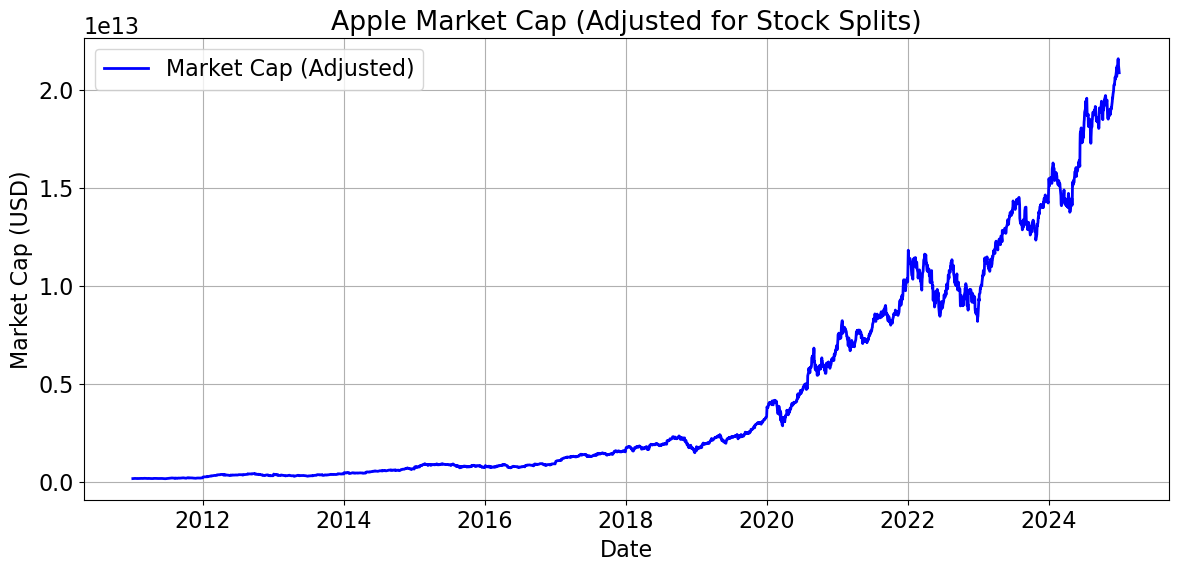

❌ No stock splits detected. Try lowering the threshold or manually inspecting the data.


In [72]:
# Display a sample of the merged data
# Select only the relevant columns
# Step 1: Detect potential splits by checking for large price drops
split_min_threshold = 0.1  # Lower limit for split detection
split_max_threshold = 0.5  # Upper limit for split detection

# Identify possible split events
merged_df['price_ratio'] = merged_df['closingPrice'] / merged_df['closingPrice'].shift(1)
split_indices = merged_df[
    (merged_df['price_ratio'] < split_max_threshold) & (merged_df['price_ratio'] > split_min_threshold)
].index

# Step 2: Apply split corrections iteratively
split_detected = False

for idx in split_indices:
    split_ratio = round(1 / merged_df.loc[idx, 'price_ratio'])  # Approximate the split ratio
    if split_ratio >= 2:  # Avoid false positives
        merged_df.loc[idx:, 'commonStockSharesOutstanding'] *= split_ratio
        print(f"✅ Detected split at {merged_df.loc[idx, 'date']} with ratio ~1/{split_ratio}")
        split_detected = True

# Step 3: Recalculate the market cap
merged_df['marketCap'] = merged_df['closingPrice'] * merged_df['commonStockSharesOutstanding']

# Step 4: Plot the corrected market cap
plt.figure(figsize=(14, 6))
plt.plot(merged_df['date'], merged_df['marketCap'], label='Market Cap (Adjusted)', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Market Cap (USD)')
plt.title('Apple Market Cap (Adjusted for Stock Splits)')
plt.grid(True)
plt.legend()
plt.show()

if not split_detected:
    print("❌ No stock splits detected. Try lowering the threshold or manually inspecting the data.")


In [20]:

#print(merged_df[['date', 'fiscalYear', 'closingPrice', 'commonStockSharesOutstanding', 'marketCap']].to_string(index=False))
date_market_cap_df = merged_df[['date', 'marketCap']]
print(date_market_cap_df)

           date     marketCap
0    2011-01-03  4.393498e+12
1    2011-01-04  4.416427e+12
2    2011-01-05  4.452554e+12
3    2011-01-06  4.448955e+12
4    2011-01-07  4.480816e+12
...         ...           ...
3575 2025-03-21           NaN
3576 2025-03-24           NaN
3577 2025-03-25           NaN
3578 2025-03-26           NaN
3579 2025-03-27           NaN

[3580 rows x 2 columns]


In [73]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to numerical format for regression
merged_df['date_ordinal'] = merged_df['date'].apply(lambda x: x.toordinal())
merged_df['marketCap'] = merged_df['marketCap'].ffill().bfill()
# Prepare X (dates) and y (market cap) for regression
X = merged_df['date_ordinal'].values.reshape(-1, 1)  # Independent variable (dates)
y = merged_df['marketCap'].values.reshape(-1, 1)      # Dependent variable (market cap)


In [74]:
# Check for NaNs
print(merged_df['marketCap'].isna().sum())
# Fill NaNs with forward fill, then backward fill
print(y)



0
[[1.56910631e+11]
 [1.57729535e+11]
 [1.59019786e+11]
 ...
 [2.08539759e+13]
 [2.08539759e+13]
 [2.08539759e+13]]


In [75]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate trend line predictions for existing dates
y_pred = model.predict(X)


In [76]:
# Project into the future (e.g., 365 days ahead)
future_days = 365
last_date = merged_df['date'].max()
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]
future_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)

# Make future predictions
future_predictions = model.predict(future_ordinals)

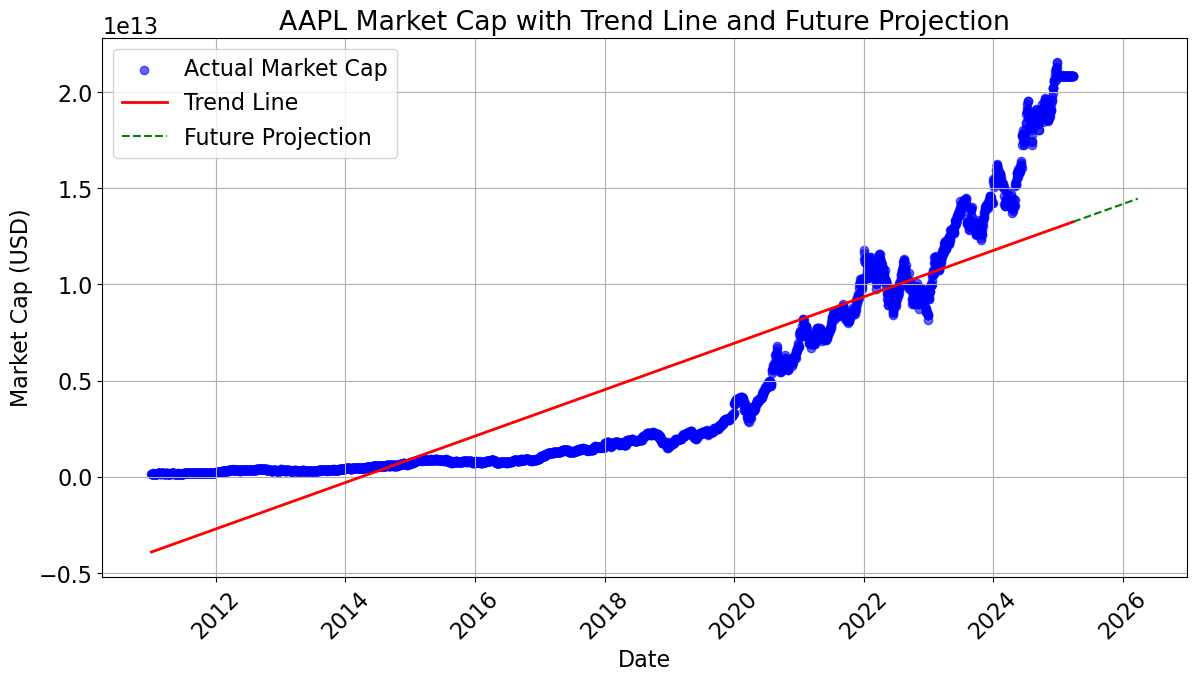

In [77]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.scatter(merged_df['date'], merged_df['marketCap'], color='blue', label='Actual Market Cap', alpha=0.6)

# Plot the trend line
plt.plot(merged_df['date'], y_pred, color='red', label='Trend Line', linewidth=2)

# Plot the future projection
plt.plot(future_dates, future_predictions, color='green', linestyle='dashed', label='Future Projection')

# Labels and legend
plt.title('AAPL Market Cap with Trend Line and Future Projection')
plt.xlabel('Date')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [78]:
from sklearn.model_selection import train_test_split

# Assuming `merged_df` contains the market cap data with the date column
# Convert date to pandas datetime format if it's not already
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort the data by date in chronological order
merged_df = merged_df.sort_values('date')

# Split the data into train, validation, and test
train_size = int(0.7 * len(merged_df))  # 70% for training
val_size = int(0.15 * len(merged_df))   # 15% for validation
test_size = len(merged_df) - train_size - val_size  # remaining 15% for testing

train_data = merged_df[:train_size]
validation_data = merged_df[train_size:train_size+val_size]
test_data = merged_df[train_size+val_size:]

# Check the sizes of the splits
print(f'Train data size: {len(train_data)}')
print(f'Validation data size: {len(validation_data)}')
print(f'Test data size: {len(test_data)}')

Train data size: 2506
Validation data size: 537
Test data size: 537


In [79]:
print(merged_df.shape)
df_market_cap = merged_df[['date', 'marketCap']].copy()

(3580, 11)


In [80]:
# ✅ Ensure datetime consistency
dfcf['fiscalDateEnding'] = pd.to_datetime(dfcf['fiscalDateEnding'])
df_market_cap['date'] = pd.to_datetime(df_market_cap['date'])

# ✅ Create next quarter end date
dfcf['nextQuarterEnd'] = dfcf['fiscalDateEnding'] + pd.DateOffset(months=3)

# ✅ Sort both DataFrames by date
dfcf = dfcf.sort_values('nextQuarterEnd')
df_market_cap = df_market_cap.sort_values('date')

# ✅ Use merge_asof with tolerance to avoid incorrect repeated mapping
final_data = pd.merge_asof(
    dfcf,
    df_market_cap,
    left_on='nextQuarterEnd',
    right_on='date',
    direction='forward',
    tolerance=pd.Timedelta("30 days")  # Allow up to 30 days difference
)

# ✅ Filter out mismatched rows (NaNs)
final_data = final_data.dropna(subset=['marketCap']).reset_index(drop=True)

# ✅ Check results
print("\nFinal merged data sample:")
print(final_data[['fiscalDateEnding', 'nextQuarterEnd', 'date', 'marketCap']].head())



Final merged data sample:
  fiscalDateEnding nextQuarterEnd       date     marketCap
0       2010-09-30     2010-12-30 2011-01-03  1.569106e+11
1       2010-12-31     2011-03-31 2011-03-31  1.659281e+11
2       2011-03-31     2011-06-30 2011-06-30  1.598149e+11
3       2011-06-30     2011-09-30 2011-09-30  1.815492e+11
4       2011-09-30     2011-12-30 2011-12-30  1.928234e+11


In [81]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = final_data.drop(columns=['marketCap', 'fiscalDateEnding', 'nextQuarterEnd', 'date'])
y = final_data['marketCap']

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Display the shapes of the resulting sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')


Training set: (34, 30), (34,)
Validation set: (11, 30), (11,)
Test set: (12, 30), (12,)


In [82]:
from sklearn.preprocessing import StandardScaler
# ✅ Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include='object').columns

# ✅ Drop non-numeric columns
X_train_numeric = X_train.drop(columns=non_numeric_cols)
X_val_numeric = X_val.drop(columns=non_numeric_cols)
X_test_numeric = X_test.drop(columns=non_numeric_cols)

# ✅ Check for NaNs
print("\nNaN count before imputation:")
print(f"Train: {X_train_numeric.isna().sum().sum()}, Val: {X_val_numeric.isna().sum().sum()}, Test: {X_test_numeric.isna().sum().sum()}")

# ✅ Option 1: Impute NaNs with the mean of each column
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_val_numeric.fillna(X_train_numeric.mean(), inplace=True)  # Use train mean for val/test
X_test_numeric.fillna(X_train_numeric.mean(), inplace=True)

# ✅ Verify NaN handling
print("\nNaN count after imputation:")
print(f"Train: {X_train_numeric.isna().sum().sum()}, Val: {X_val_numeric.isna().sum().sum()}, Test: {X_test_numeric.isna().sum().sum()}")

# ✅ Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



NaN count before imputation:
Train: 0, Val: 0, Test: 0

NaN count after imputation:
Train: 0, Val: 0, Test: 0


In [83]:
# ✅ Convert scaled arrays back to DataFrames for readability
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)
X_val_df = pd.DataFrame(X_val_scaled, columns=X_val_numeric.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns)

# ✅ Add the target market cap values for reference
X_train_df['Target_MarketCap'] = y_train.values
X_val_df['Target_MarketCap'] = y_val.values
X_test_df['Target_MarketCap'] = y_test.values



In [84]:
print(y_train.head(8))

53    1.415942e+13
15    5.871962e+11
9     3.027492e+11
16    6.557947e+11
24    9.048727e+11
33    2.159769e+12
54    1.805007e+13
52    1.545936e+13
Name: marketCap, dtype: float64


/var/folders/8g/_56q3nhs07g6dmqp43hb7tqc0000gn/T/ipykernel_24095/937953539.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_with_target.corr()


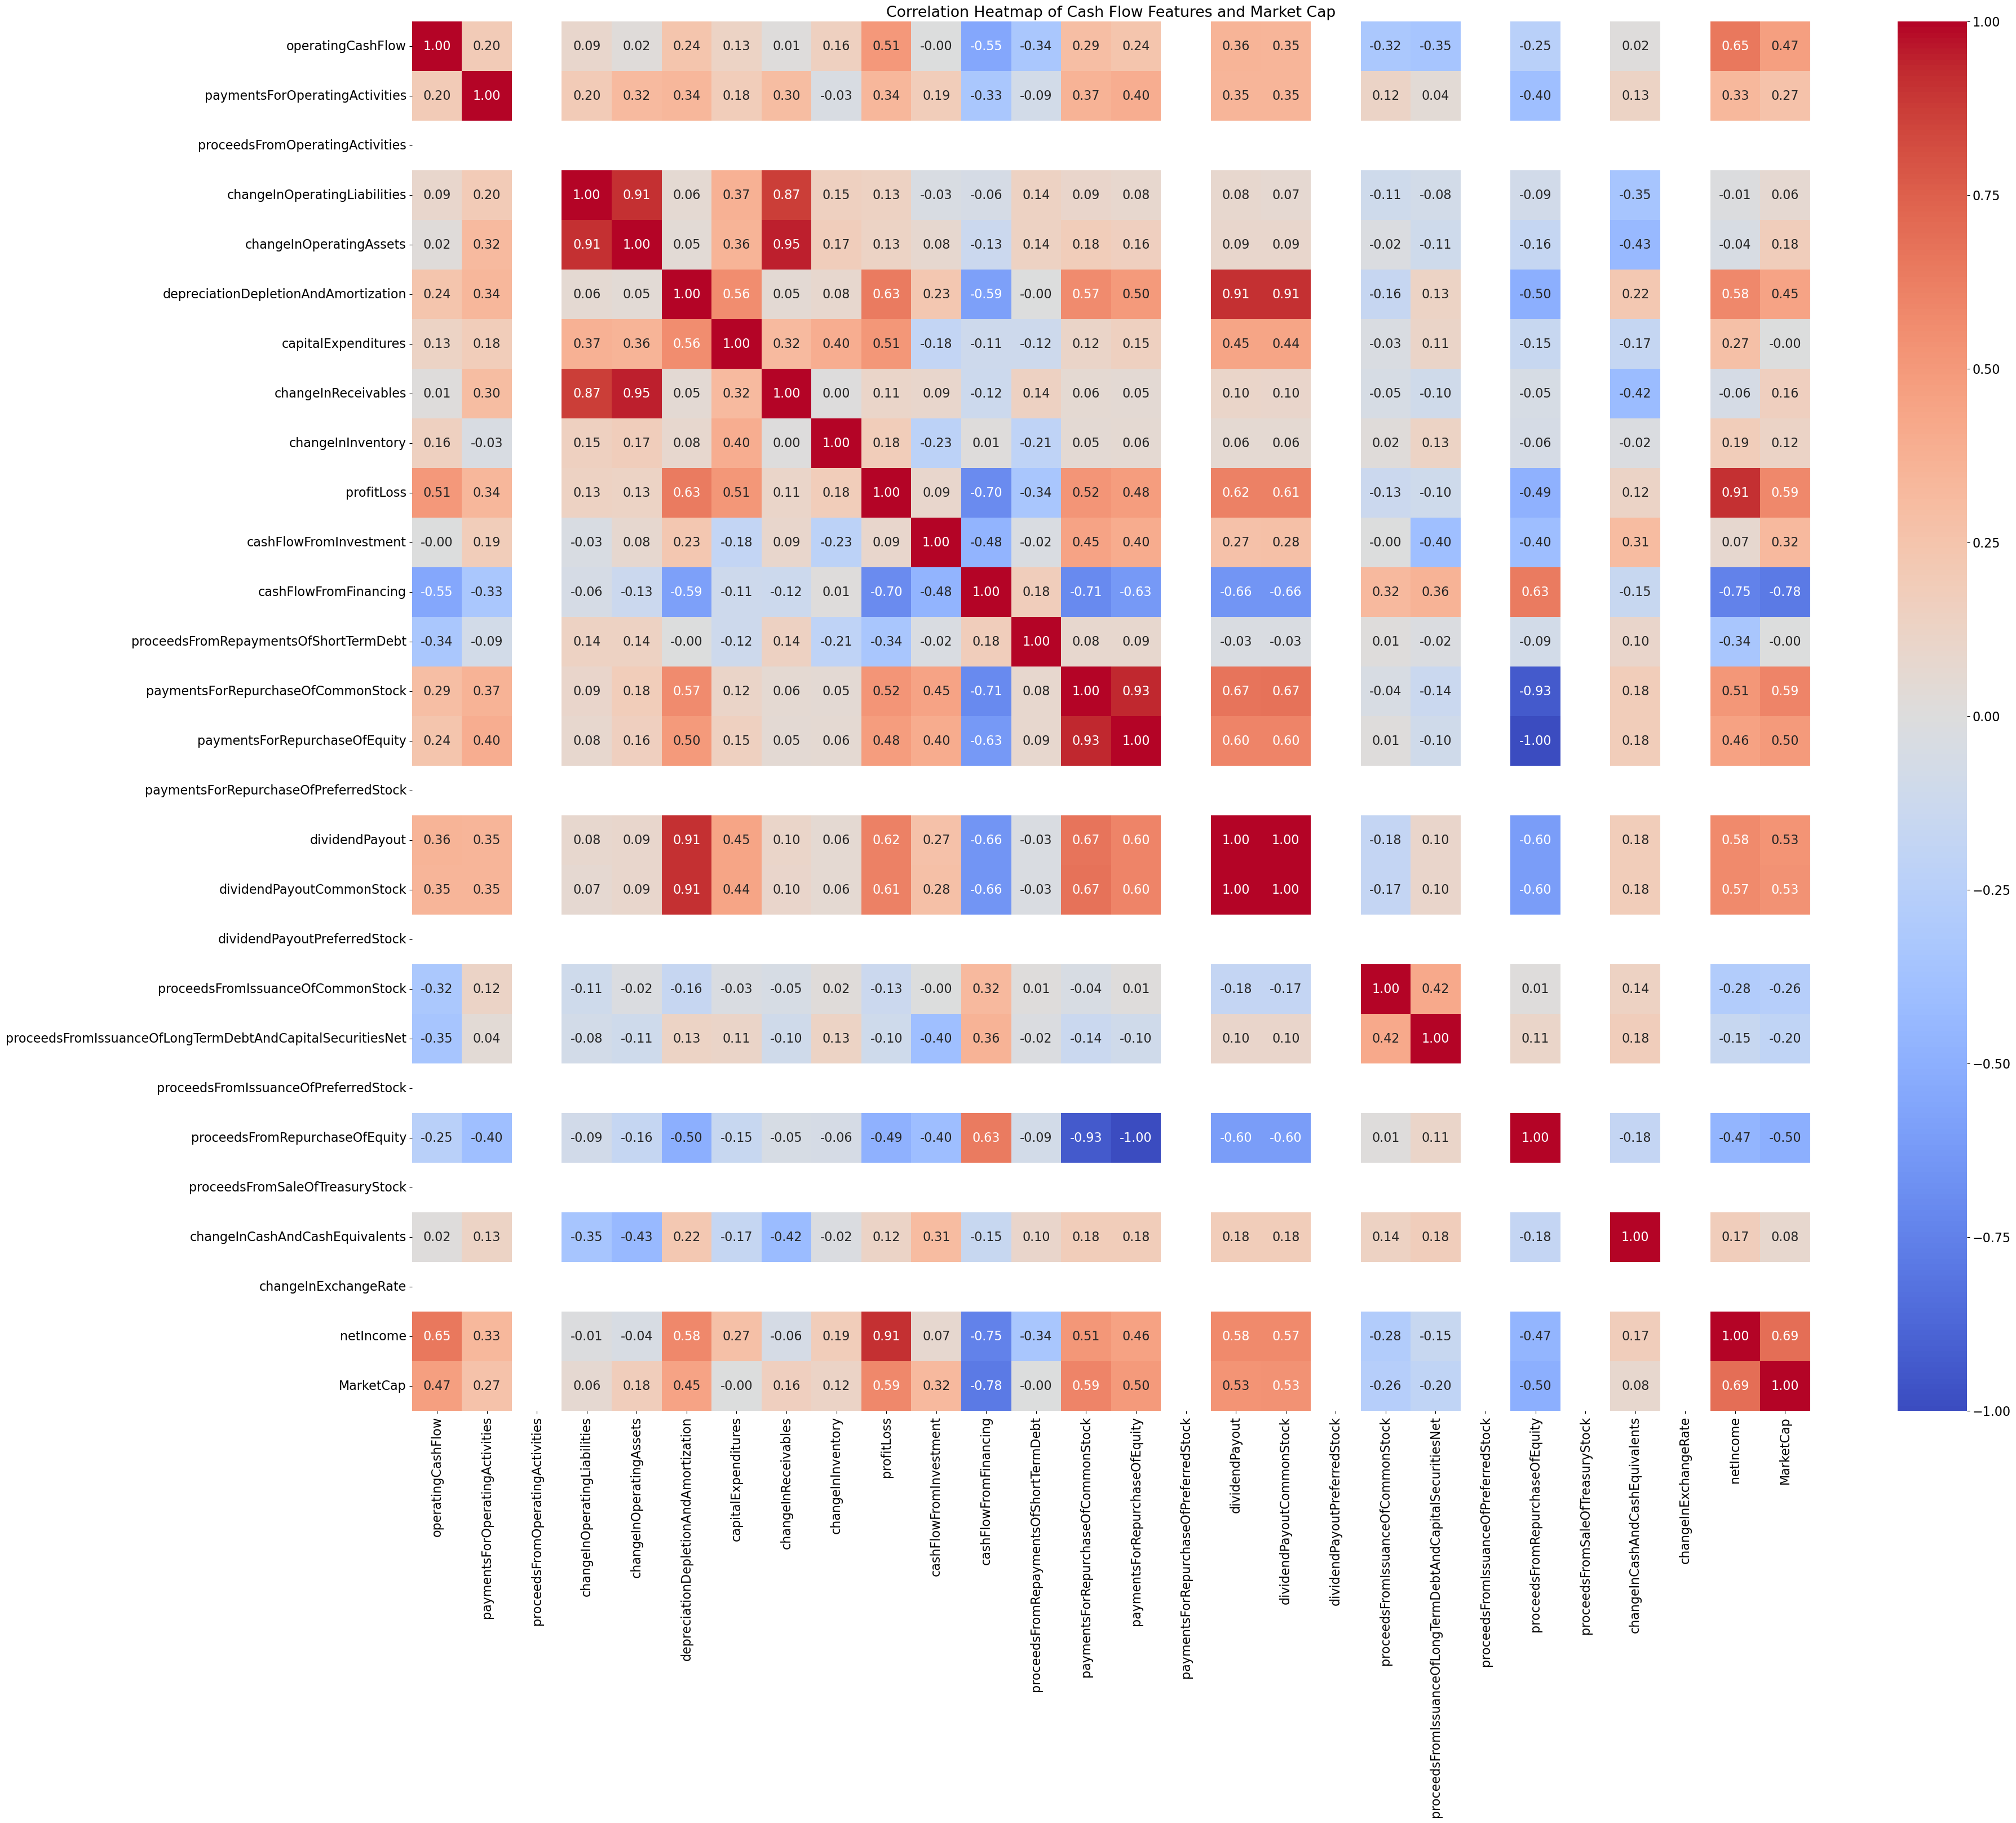

Correlations with MarketCap:
MarketCap                                                    1.000000
netIncome                                                    0.688333
paymentsForRepurchaseOfCommonStock                           0.593834
profitLoss                                                   0.585602
dividendPayoutCommonStock                                    0.531865
dividendPayout                                               0.529783
paymentsForRepurchaseOfEquity                                0.495624
operatingCashFlow                                            0.472518
depreciationDepletionAndAmortization                         0.450464
cashFlowFromInvestment                                       0.321518
paymentsForOperatingActivities                               0.265422
changeInOperatingAssets                                      0.176017
changeInReceivables                                          0.163506
changeInInventory                                            

In [85]:

import seaborn as sns
import matplotlib.pyplot as plt

data_with_target = X_train.copy()
data_with_target['MarketCap'] = y_train

# Calculate correlation matrix
correlation_matrix = data_with_target.corr()

# Create heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Cash Flow Features and Market Cap')
plt.show()

# Print correlations with MarketCap
print("Correlations with MarketCap:")
print(correlation_matrix['MarketCap'].sort_values(ascending=False))

In [86]:
print(dfe.head(8))

  ticker fiscalDateEnding reportedDate  reportedEPS  estimatedEPS  surprise  \
0   AAPL       1996-03-31   1996-04-17        -0.05         -0.02     -0.02   
1   AAPL       1996-06-30   1996-07-17        -0.04          0.02      0.02   
2   AAPL       1996-09-30   1996-10-16        -0.01          0.01      0.01   
3   AAPL       1996-12-31   1997-01-15        -0.02         -0.01     -0.01   
4   AAPL       1997-03-31   1997-04-16        -0.04         -0.01     -0.01   
5   AAPL       1997-06-30   1997-07-16        -0.02          0.00      0.00   
6   AAPL       1997-09-30   1997-10-15         0.00          0.00      0.00   
7   AAPL       1997-12-31   1998-01-14         0.01          0.00      0.00   

   suprisePercentage  reportTime stock nextQuarterEnd  
0              -40.0  pre-market  None     1996-06-30  
1               50.0  pre-market  None     1996-09-30  
2              118.0  pre-market  None     1996-12-30  
3              -50.0  pre-market  None     1997-03-31  
4       

In [87]:
from sklearn.model_selection import train_test_split

# ✅ Ensure datetime consistency
dfe['fiscalDateEnding'] = pd.to_datetime(dfe['fiscalDateEnding'])
dfe['reportedDate'] = pd.to_datetime(dfe['reportedDate'])
df_market_cap['date'] = pd.to_datetime(df_market_cap['date'])

# ✅ Create next quarter end date (approximation)
dfe['nextQuarterEnd'] = dfe['fiscalDateEnding'] + pd.DateOffset(months=3)

# ✅ Sort both DataFrames by date
dfe = dfe.sort_values('nextQuarterEnd')
df_market_cap = df_market_cap.sort_values('date')

# ✅ Use merge_asof with tolerance to avoid incorrect repeated mapping
final_data = pd.merge_asof(
    dfe,
    df_market_cap,
    left_on='nextQuarterEnd',
    right_on='date',
    direction='forward',
    tolerance=pd.Timedelta("30 days")  # Allow up to 30 days difference
)

# ✅ Filter out mismatched rows (NaNs)
final_data = final_data.dropna(subset=['marketCap']).reset_index(drop=True)

# ✅ Check results
print("\nFinal merged data sample:")
print(final_data[['fiscalDateEnding', 'nextQuarterEnd', 'date', 'marketCap']].head())

# Define features (X) and target (y)
X = final_data.drop(columns=['marketCap', 'fiscalDateEnding', 'nextQuarterEnd', 'date', 'ticker', 'stock'])
y = final_data['marketCap']

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Display the shapes of the resulting sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')



Final merged data sample:
  fiscalDateEnding nextQuarterEnd       date     marketCap
0       2010-09-30     2010-12-30 2011-01-03  1.569106e+11
1       2010-12-31     2011-03-31 2011-03-31  1.659281e+11
2       2011-03-31     2011-06-30 2011-06-30  1.598149e+11
3       2011-06-30     2011-09-30 2011-09-30  1.815492e+11
4       2011-09-30     2011-12-30 2011-12-30  1.928234e+11
Training set: (34, 6), (34,)
Validation set: (11, 6), (11,)
Test set: (12, 6), (12,)


/var/folders/8g/_56q3nhs07g6dmqp43hb7tqc0000gn/T/ipykernel_24095/976728424.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_with_target.corr()


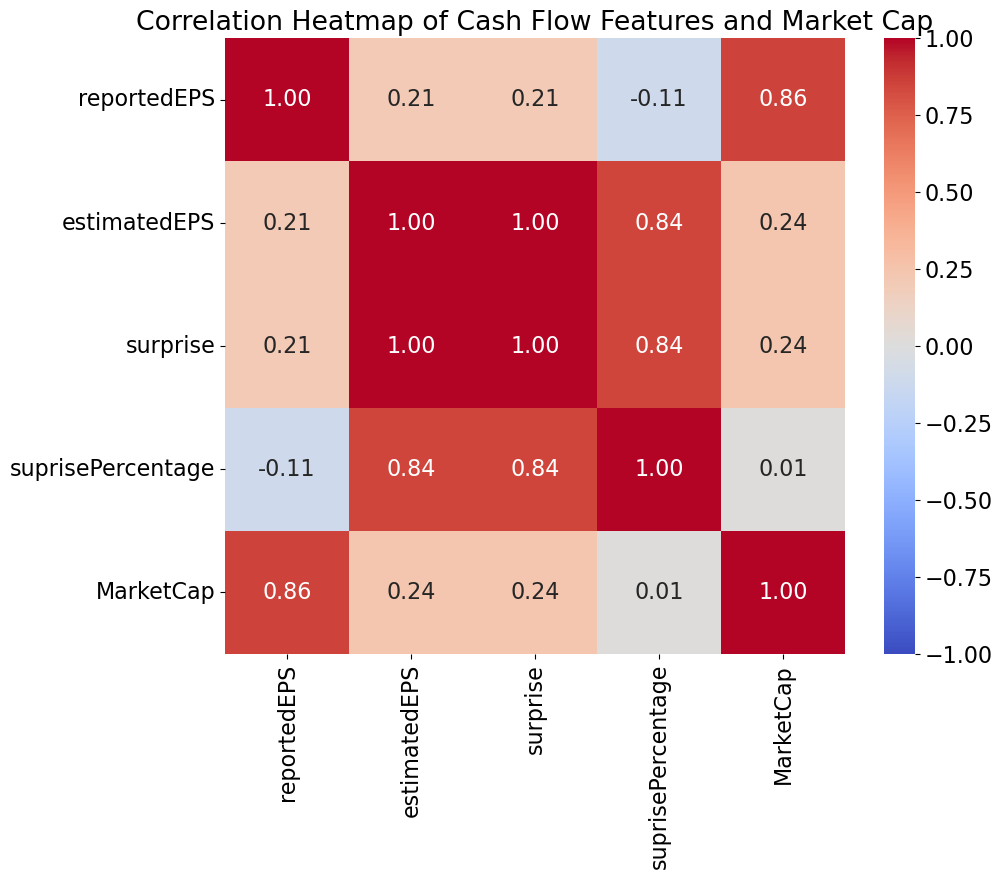

Correlations with MarketCap:
MarketCap            1.000000
reportedEPS          0.859056
estimatedEPS         0.237660
surprise             0.237660
suprisePercentage    0.008594
Name: MarketCap, dtype: float64


In [88]:
"""
Training set: (34, 30), (34,)
Validation set: (11, 30), (11,)
Test set: (12, 30), (12,)
"""


import seaborn as sns
import matplotlib.pyplot as plt

data_with_target = X_train.copy()
data_with_target['MarketCap'] = y_train

# Calculate correlation matrix
correlation_matrix = data_with_target.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Cash Flow Features and Market Cap')
plt.show()

# Print correlations with MarketCap
print("Correlations with MarketCap:")
print(correlation_matrix['MarketCap'].sort_values(ascending=False))

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure datetime consistency
dfe['fiscalDateEnding'] = pd.to_datetime(dfe['fiscalDateEnding'])
dfcf['fiscalDateEnding'] = pd.to_datetime(dfcf['fiscalDateEnding'])
df_market_cap['date'] = pd.to_datetime(df_market_cap['date'])

# Create next quarter end date
dfe['nextQuarterEnd'] = dfe['fiscalDateEnding'] + pd.DateOffset(months=3)
dfcf['nextQuarterEnd'] = dfcf['fiscalDateEnding'] + pd.DateOffset(months=3)

# Sort by date
dfe = dfe.sort_values('nextQuarterEnd')
dfcf = dfcf.sort_values('nextQuarterEnd')
df_market_cap = df_market_cap.sort_values('date')

# Merge dfe and dfcf on ticker and fiscalDateEnding
merged_financials = pd.merge(
    dfe[['ticker', 'fiscalDateEnding', 'nextQuarterEnd', 'reportedEPS']],
    dfcf[['ticker', 'fiscalDateEnding', 'netIncome', 'paymentsForRepurchaseOfCommonStock', 
          'profitLoss', 'dividendPayoutCommonStock']],
    on=['ticker', 'fiscalDateEnding'],
    how='inner'
)

# Merge with market cap using merge_asof
final_data = pd.merge_asof(
    merged_financials,
    df_market_cap,
    left_on='nextQuarterEnd',
    right_on='date',
    direction='forward',
    tolerance=pd.Timedelta("30 days")
)

# Filter out rows without marketCap
final_data = final_data.dropna(subset=['marketCap']).reset_index(drop=True)

# Define features (X) and target (y)
features = ['reportedEPS', 'netIncome', 'paymentsForRepurchaseOfCommonStock', 
            'profitLoss', 'dividendPayoutCommonStock']
X = final_data[features]
y = final_data['marketCap']

# Verify shapes
print("X shape:", X.shape)  # Should be (57, 5)
print("y shape:", y.shape)  # Should be (57,)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display shapes
print(f'Training set: {X_train.shape}, {y_train.shape}')  # (34, 5), (34,)
print(f'Validation set: {X_val.shape}, {y_val.shape}')  # (11, 5), (11,)
print(f'Test set: {X_test.shape}, {y_test.shape}')      # (12, 5), (12,)

X shape: (57, 5)
y shape: (57,)
Training set: (34, 5), (34,)
Validation set: (11, 5), (11,)
Test set: (12, 5), (12,)


In [90]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Log-transform y
y_log = np.log1p(y)

# Split data
X_train, X_temp, y_train_log, y_temp_log = train_test_split(X, y_log, test_size=0.4, random_state=42)
X_val, X_test, y_val_log, y_test_log = train_test_split(X_temp, y_temp_log, test_size=0.5, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Grid search for SVR
param_grid = {
    'C': [10, 100, 1000],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
svm = SVR()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_log)

# Best model
best_svm = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

# Predict and evaluate on log scale
y_val_pred_log = best_svm.predict(X_val_scaled)
val_mse_log = mean_squared_error(y_val_log, y_val_pred_log)
print(f"Validation MSE (log scale): {val_mse_log}")

y_test_pred_log = best_svm.predict(X_test_scaled)
test_mse_log = mean_squared_error(y_test_log, y_test_pred_log)
print(f"Test MSE (log scale): {test_mse_log}")

# Convert back to original scale
y_val_pred = np.expm1(y_val_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
val_mse = mean_squared_error(np.expm1(y_val_log), y_val_pred)
test_mse = mean_squared_error(np.expm1(y_test_log), y_test_pred)
print(f"Validation MSE (original scale): {val_mse}")
print(f"Test MSE (original scale): {test_mse}")

Best params: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Validation MSE (log scale): 0.25059700052041184
Test MSE (log scale): 0.1036342202072269
Validation MSE (original scale): 4.3788150638239344e+24
Test MSE (original scale): 7.661630152518525e+23


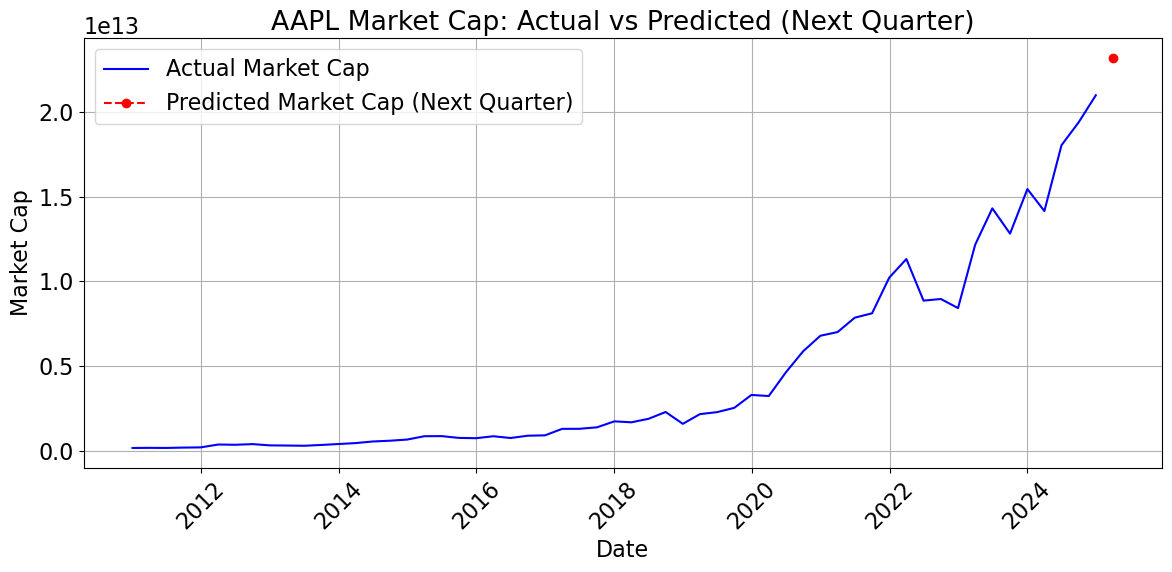

Predicted Market Cap for 2025-03-31: 2.32e+13


'\nValidation MSE (log scale): 0.25092073584509483\nTest MSE (log scale): 0.10362829407588119\n'

In [91]:
# Assume latest quarter data from your dataset (e.g., last row of X)
historical_dates = final_data['date']  # Real dates from df_market_cap
historical_mcap = final_data['marketCap']  # Real market caps

# Latest data for prediction (last row of X)
latest_data = X.iloc[-1].to_frame().T

# Scale and predict for next 2 quarters
future_quarters = 1
future_X = pd.DataFrame([latest_data.values[0]] * future_quarters, columns=features)
future_X_scaled = scaler.transform(future_X)
future_log_preds = best_svm.predict(future_X_scaled)
future_mcap_preds = np.expm1(future_log_preds)

# Future dates (next 2 quarters from last historical date)
future_dates = pd.date_range(start=historical_dates.iloc[-1], periods=future_quarters + 1, freq='Q')[1:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, historical_mcap, label='Actual Market Cap', color='blue')
plt.plot(future_dates, future_mcap_preds, label='Predicted Market Cap (Next Quarter)', 
         color='red', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('AAPL Market Cap: Actual vs Predicted (Next Quarter)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print predictions
for i, (date, pred) in enumerate(zip(future_dates, future_mcap_preds)):
    print(f"Predicted Market Cap for {date.strftime('%Y-%m-%d')}: {pred:.2e}")
    
"""
Validation MSE (log scale): 0.25092073584509483
Test MSE (log scale): 0.10362829407588119
"""

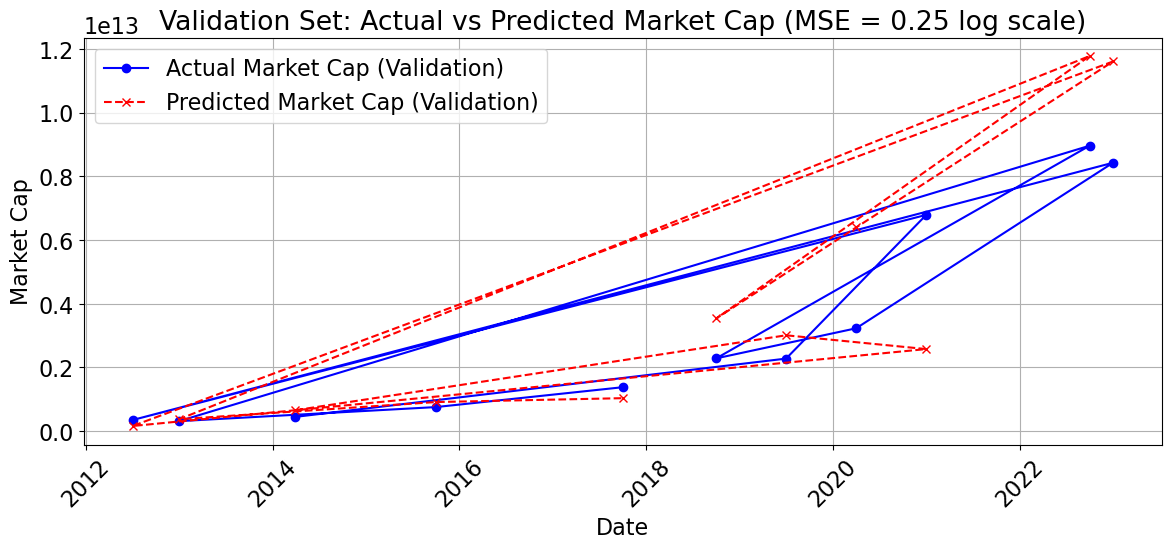

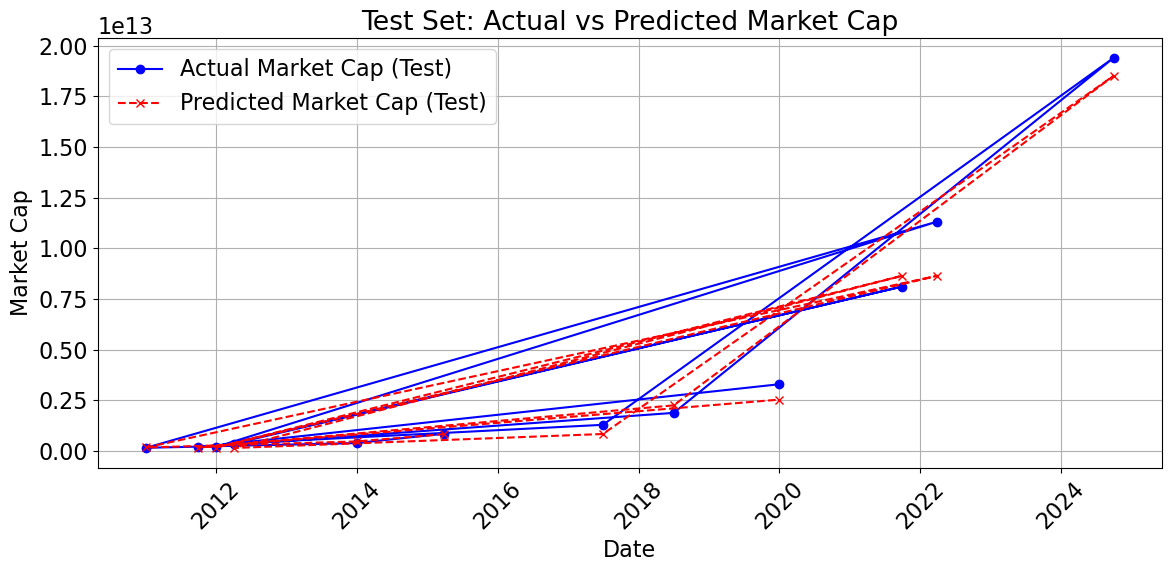

Validation MSE (log scale): 0.251
Test MSE (log scale): 0.104


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_svm, scaler, X_val, X_test, y_val_log, y_test_log are from your grid search
# Predict on validation and test sets
y_val_pred_log = best_svm.predict(X_val_scaled)
y_test_pred_log = best_svm.predict(X_test_scaled)

# Convert back to original scale
y_val_pred = np.expm1(y_val_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_val_actual = np.expm1(y_val_log)
y_test_actual = np.expm1(y_test_log)

# Get corresponding dates (assuming final_data is indexed consistently with splits)
val_indices = X_val.index  # Indices from the split
test_indices = X_test.index
val_dates = final_data.loc[val_indices, 'date']
test_dates = final_data.loc[test_indices, 'date']

# Plot Validation Set
plt.figure(figsize=(12, 6))
plt.plot(val_dates, y_val_actual, label='Actual Market Cap (Validation)', color='blue', marker='o')
plt.plot(val_dates, y_val_pred, label='Predicted Market Cap (Validation)', color='red', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Validation Set: Actual vs Predicted Market Cap (MSE = 0.25 log scale)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Test Set
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual, label='Actual Market Cap (Test)', color='blue', marker='o')
plt.plot(test_dates, y_test_pred, label='Predicted Market Cap (Test)', color='red', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Test Set: Actual vs Predicted Market Cap')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print MSE for reference (assuming 0.25 was your latest log-scale validation MSE)
print(f"Validation MSE (log scale): {mean_squared_error(y_val_log, y_val_pred_log):.3f}")
print(f"Test MSE (log scale): {mean_squared_error(y_test_log, y_test_pred_log):.3f}")